# Assignment #5 - Deep Learning  (Extra Credits)

### Aditya Rathi
### 801075901

#### Contents
 
1. Overview
2. Data
3. Method 
4. Result
5. Conclusion
6. Refrences


# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

What is deep learning?Deep learning is a sub-field of machine learning that uses algorithms inspired by the structure and function of the brain's neural networks. The neural networks that we use in deep learning aren't actual biological neural networks though. They simply share some characteristics with biological neural networks and for this reason, we call them artificial neural networks (ANNs). I will be using the keras library for implementation of this assignment

# II. Data (Classification)

The data which I chose for this assignment belongs to the bank marketing data. Banking being an important field classification model can help us explore new scenarios in this data. Modeling based can help us explore new feature in this data.

#### Data Source: 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The main thing of marketing of a product is to call the customer and explain them the product. The call can be done in a few attempts. The main output for this is to predict whether the bank customer after receiving the call buy the product from the marketing team. The classification model will help us analyse which customer would buy the product. 

#### Features

Input variables:

bank client data:

1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
 
related with the last contact of the current campaign:

8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)



### Code

#### Reading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [2]:
df1=df.copy(deep=True)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
list(df1.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [4]:
df1.columns = [c.replace('.', '_') for c in df1.columns]
list(df1.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [5]:
df1.duration.unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [6]:
job_map={'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':10,'entrepreneur':11, 'student':12}
df1['job']=df1['job'].map(job_map)
marital_map={'married':1, 'single':2, 'divorced':3, 'unknown':4}
df1['marital']=df1['marital'].map(marital_map)
education_map={'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,'professional.course':5, 'unknown':6, 'university.degree':7,     'illiterate':8}
df1['education']=df1['education'].map(education_map)
default_map={'no':1, 'unknown':3, 'yes':2}
df1['default']=df1['default'].map(default_map)
housing_map={'no':1, 'yes':2, 'unknown':3}
df1['housing']=df1['housing'].map(housing_map)
loan_map={'no':1, 'yes':2, 'unknown':3}
df1['loan']=df1['loan'].map(loan_map)
contact={'telephone':1, 'cellular':2}
df1['contact']=df1['contact'].map(contact)
month={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9}
df1['month']=df1['month'].map(month)
day={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df1['day_of_week']=df1['day_of_week'].map(day)
poutcome={'nonexistent':1, 'failure':2, 'success':3}
df1['poutcome']=df1['poutcome'].map(poutcome)
y={'no':0, 'yes':1}
df1['y']=df1['y'].map(y)



In [7]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
D=df.head(10000)

groupName = []                                   
count = []
for group_name, subset in D.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
[1299, 761, 1820, 2382, 2, 1142, 2109, 485]


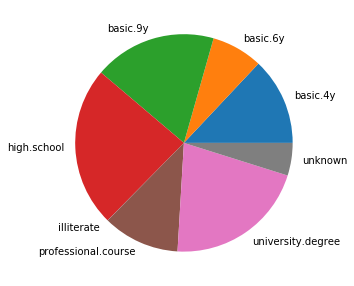

In [9]:
#groupName=['basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown', 'university.degree',     'illiterate']
plt.figure(figsize = (5, 5))
plt.pie(count, labels = groupName)
plt.show()

The pie chart helps us to know what is the education level of the people in the dataset

<Figure size 1080x432 with 0 Axes>

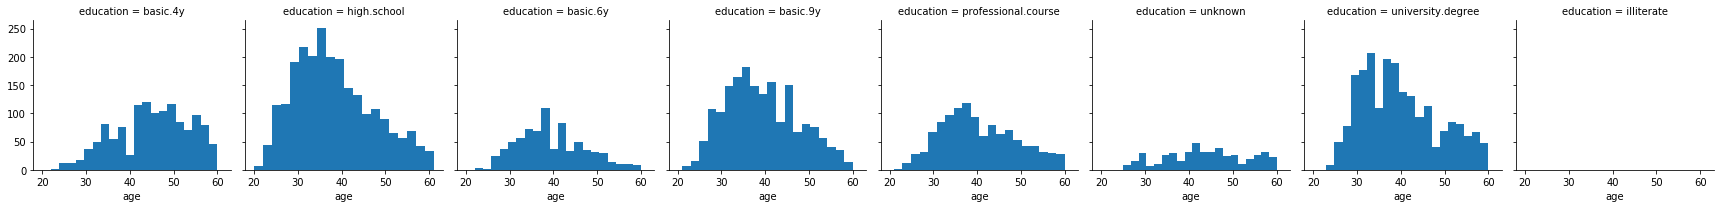

In [10]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(D, col='education')
g.map(plt.hist, 'age', bins=20)

This visualization was done to plot the histogram of people with age group with respect to the education they have. There is two figures with education to high school and university degree are major showcase from this visualization

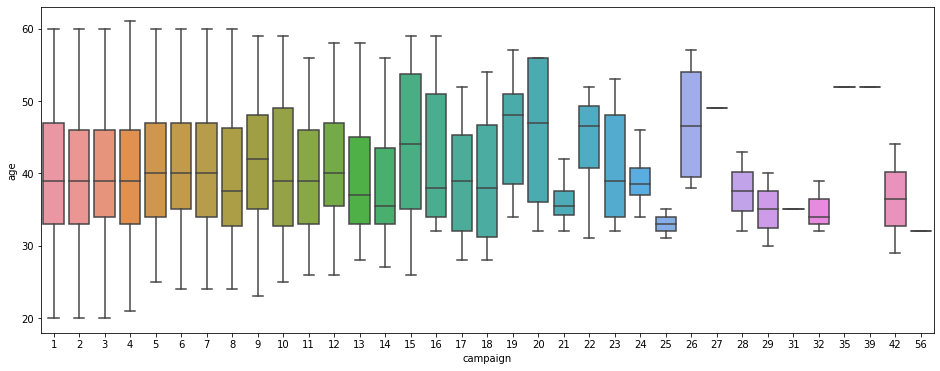

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='campaign', y='age', data=D)

This Visualization was done to show the campaign of calls (nos.of calls) done by marketing team to customer based on their age group

In [12]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

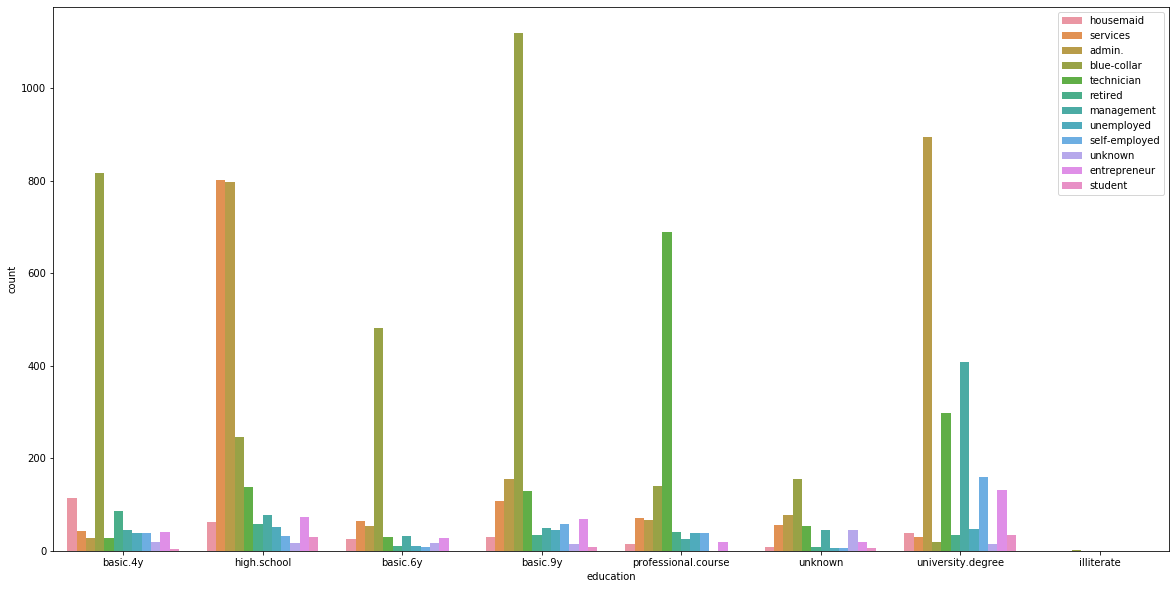

In [13]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(D['education'],hue=D['job'])
plt.legend(loc='upper right', labels=['housemaid', 'services', 'admin.', 'blue-collar', 'technician',       'retired', 'management', 'unemployed', 'self-employed', 'unknown',       'entrepreneur', 'student'])

The bargraph shows the count of people with respect to education and job type they are doing.

<Figure size 1440x1368 with 0 Axes>

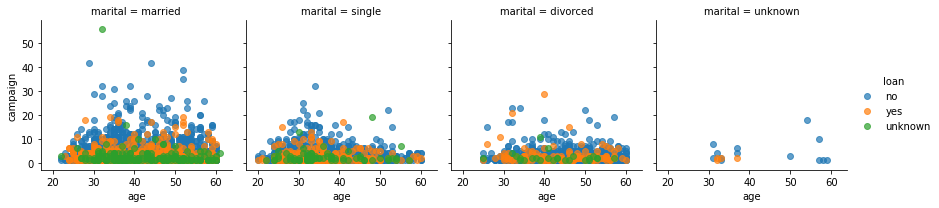

In [14]:
plt.figure(figsize=(20,19))
g = sns.FacetGrid(D, hue="loan", col="marital")
g.map(plt.scatter, "age", "campaign", alpha=.7)
g.add_legend();

Visualization of the campaign of calls done to people based on their marital status and the loan if they have any.

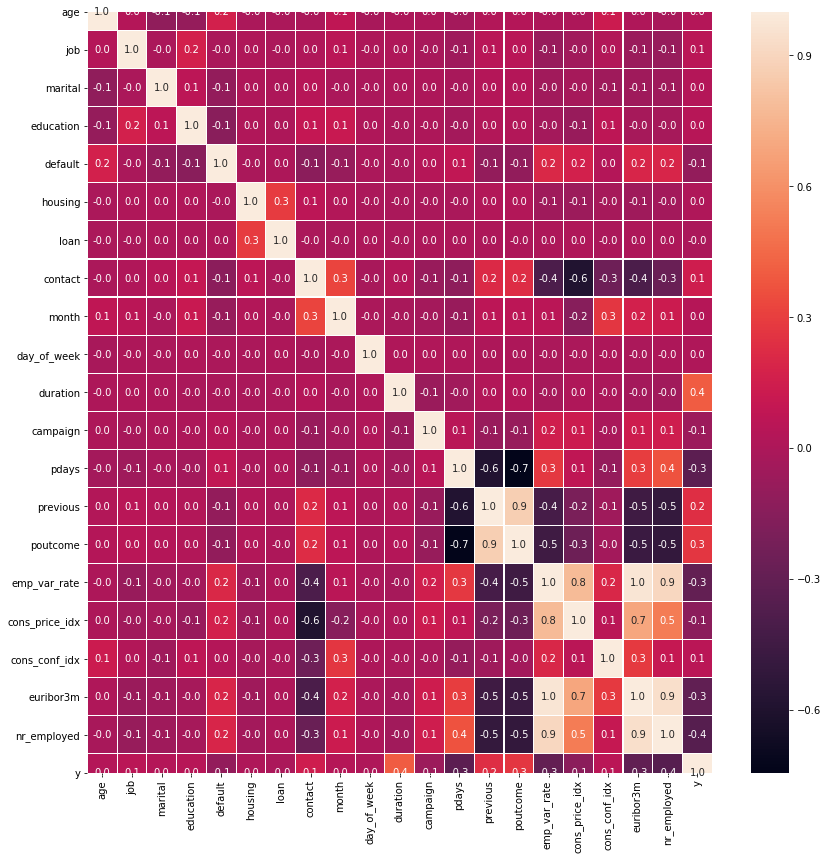

In [15]:
plt.subplots(figsize=(14, 14))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

### Preliminary observation

1. From the pie chart we got to know that majority of the people are literate with a basic high school education. 
2. Vast majority of people have education in two types i.e High School and University degree compared to others.
3. The box plot gives us the around 15 or 16 calls to middle age group of people 40 t0 60yrs.
4. People with university degree are vast majority working as services and technicians or are self employed. And starting education with basic 4 year to 9 year college majority of people work as blue collar jobs.
5. The last is people whose marital status is not known doesnot have a loan with them or only few people have a loan on themselves.
6. People who are married and doesn't have a loan gets more number call for the marketing of this product compared to people with unknown loan status get only few calls.
7. The heat map gives us a good idea about all the correleation between the features we can use during our classification problem.


### III. METHODS 


In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />




In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers, losses, optimizers, metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

import matplotlib as mt
from matplotlib import pyplot as plt

C:\Users\rathi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rathi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rathi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rathi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [17]:
def normalize(X):
    return X/X.max()

In [18]:
df2=df1.copy(deep=True)

In [19]:

#df2["age"] = normalize(df2["age"])
#df2["job"] = normalize(df2["job"])
#df2["housing"] = normalize(df2["housing"])
#df2["duration"] = normalize(df2["duration"])
#df2["education"] = normalize(df2["education"])
#df2["default"] = normalize(df2["default"])
#df2["contact"] = normalize(df2["contact"])
#df2["marital"] = normalize(df2["marital"])

data = df2.sample(10000)
training_data = data.iloc[:10000,:]

X = training_data[["age","job","education","housing",'default','contact','duration','marital']].values
#X = X.as_matrix()
T = training_data[["y"]].values
#T = T.as_matrix()
normalize = StandardScaler()
norm_x = normalize.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(norm_x, T, test_size=0.2, random_state=1)
print('Training Shape',X_train.shape)
print('Testing Shape',X_test.shape)



Training Shape (8000, 8)
Testing Shape (2000, 8)


C:\Users\rathi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rathi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
def activation_addition(model,neuron,activa):
    for i in range(len(neuron)):
        model.add(Dense(units=neuron[i], activation=activa[i]))
    return model

#### Explanation of the choice for 3 different neural network structures and reason for the selection.

Sequential model of keras is used to implement different neural network. We can create different structure of neural network by changing the number of neurons for different activation functions.

In the model that I have implemented I have used the same Keras sequential method with tanh,relu,elu and softmax activation function. The number of neuron for each activation function is present in the list of number of neuron variable. 


### Model 1

For model1 I have used various activation function which is stored in nos_activation_function variable and list of number of neuros is there in nos_of_neuron variable.The result1 variable has the results of loss, accuracy for number of epochs 


In [24]:
Model1=keras.models.Sequential()
model = Model1.add(Dense(input_dim=8, units=8,activation='tanh'))
nos_of_neuron = [9,12,13,11,1]
nos_activation_funcions = ['tanh','softmax','relu','elu','tanh']
model1=activation_addition(Model1,nos_of_neuron,nos_activation_funcions)
opt1 = optimizers.Adam(lr=0.0015)
Model1.compile(opt1, loss='binary_crossentropy', metrics=['accuracy'])
result1 = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 78us/step - loss: 0.2960 - accuracy: 0.8863 - val_loss: 0.2672 - val_accuracy: 0.8900
Epoch 2/10
8000/8000 [==============================] - 0s 43us/step - loss: 0.2851 - accuracy: 0.8901 - val_loss: 0.2663 - val_accuracy: 0.8915
Epoch 3/10
8000/8000 [==============================] - 0s 36us/step - loss: 0.3011 - accuracy: 0.8915 - val_loss: 0.2699 - val_accuracy: 0.8880
Epoch 4/10
8000/8000 [==============================] - 0s 37us/step - loss: 0.2690 - accuracy: 0.8941 - val_loss: 0.2927 - val_accuracy: 0.8845
Epoch 5/10
8000/8000 [==============================] - 0s 39us/step - loss: 0.2772 - accuracy: 0.8929 - val_loss: 0.3324 - val_accuracy: 0.8905
Epoch 6/10
8000/8000 [==============================] - 0s 45us/step - loss: 0.2703 - accuracy: 0.8926 - val_loss: 0.2730 - val_accuracy: 0.8910
Epoch 7/10
8000/8000 [==============================] - 0s 45us/step - loss: 0.303

## IV. Results

#### Presents the result of Your Applications of your deep Network

In [25]:
print("Accuracy of model 1")
print(result1.history['accuracy'][-1] * 100)

Accuracy of model 1
89.34999704360962


Text(0.5, 1.0, 'Accuracy')

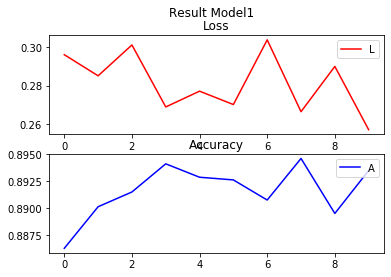

In [26]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Result Model1')
ax1.plot(result1.history['loss'],c='red',label='Loss')
ax1.set_title('Loss')
ax2.plot(result1.history['accuracy'],c='blue',label='Accuracy')
ax1.legend("Loss",loc="upper right")
ax2.legend("Accuracy",loc="upper right")
ax2.set_title('Accuracy')

In the above fig. we can see that as the loss has increased in the 4th epoch we can see the accuracy also has been decreased for that instance


## V. Conclusion

In this assignment I got deep knowledge about deep learning and neural networks. The main challenge for me was to select the right activation function and right number of neuros for my assignment to get a better accuracy score. One of the main problem which I faced was installing Keras on my laptop. As I tried installing keras while starting the assignment I faced the problem of Kernel dead while executing the keras. Other than that I got a goog kowledge about the deep neural network and I go to know that small changes in the network can give you a differet prediction score.


## VI. Refrences

- deeplizard - Building Collective Intelligence. (n.d.). Retrieved from https://deeplizard.com/
- Home - Keras Documentation. (n.d.). Retrieved from https://keras.io/
- A computer science portal for geeks. (n.d.). Retrieved from https://www.geeksforgeeks.org/
- Legend guide — Matplotlib 3.1.1 documentation. (n.d.). Retrieved from https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html


